In [1]:
import numpy as np
import matplotlib.pyplot as pyplt 

import pandas as pd  
import seaborn as sb 

from scipy.stats.stats import pearsonr
from scipy.stats import shapiro, anderson

%matplotlib inline

import statsmodels.api as sm
import statsmodels.stats.api as sma
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import scipy as sp

from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor   


In [ ]:
from sklearn.datasets import load_boston
boston_df=load_boston()
boston_df

In [ ]:
boston_df

In [ ]:
boston_df.DESCR

In [8]:
boston_df.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
boston = pd.DataFrame(boston_df.data, columns=boston_df.feature_names)
boston['MEDV']=boston_df.target
boston.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
boston=boston[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B' , 'LSTAT', 'MEDV']]
boston

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.524,5.631,100.0,6.0821,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.524,6.004,85.9,6.5921,311.0,15.2,386.71,17.10,18.9


In [5]:
boston.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
#check missing data

boston.isnull()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#check missing data

boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

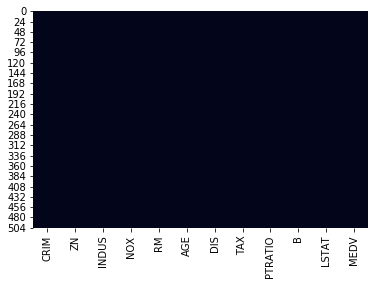

In [13]:
#map missing values

sb.heatmap(boston.isnull(), cbar=False)
    

In [14]:
# Compute the correlation matrix
corr = boston.corr()
corr

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,0.417521,-0.219940,0.350784,-0.377904,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.417521,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996,0.249929
TAX,0.579564,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.288250,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044,-0.507787
B,-0.377365,0.175520,-0.356977,-0.380051,0.128069,-0.273534,0.291512,-0.441808,-0.177383,1.000000,-0.366087,0.333461


In [17]:
pearsonr(boston['CRIM'], boston['MEDV'])

(-0.3858316898839905, 2.0835501108141935e-19)

In [8]:
pearsonr(boston['LSTAT'], boston['MEDV'])

(-0.7376627261740147, 5.081103394389002e-88)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


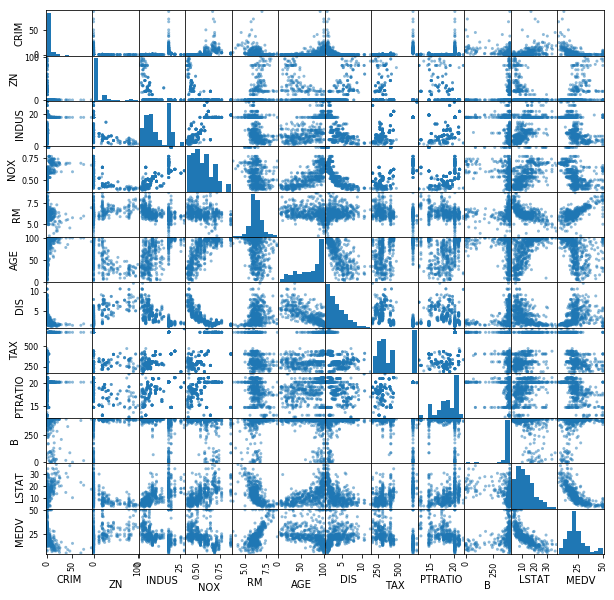

In [5]:
pd.scatter_matrix(boston, figsize=(10,10))
pyplt.show()

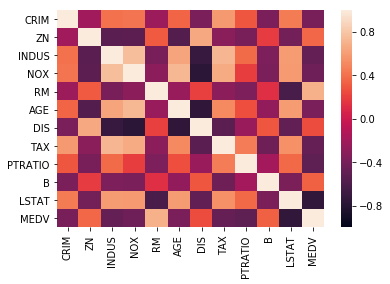

In [17]:

cor_mtx = boston.corr().round(2)
sb.heatmap(data=cor_mtx, vmin=-1, vmax=1)

In [18]:
sub_boston=boston[['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']]
sub_boston

,INDUS,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.31,6.575,296.0,15.3,4.98,24.0
1,7.07,6.421,242.0,17.8,9.14,21.6
2,7.07,7.185,242.0,17.8,4.03,34.7
3,2.18,6.998,222.0,18.7,2.94,33.4
4,2.18,7.147,222.0,18.7,5.33,36.2
5,2.18,6.430,222.0,18.7,5.21,28.7
6,7.87,6.012,311.0,15.2,12.43,22.9
7,7.87,6.172,311.0,15.2,19.15,27.1
8,7.87,5.631,311.0,15.2,29.93,16.5
9,7.87,6.004,311.0,15.2,17.10,18.9


In [19]:
sub_boston.corr()


,INDUS,RM,TAX,PTRATIO,LSTAT,MEDV
INDUS,1.000000,-0.391676,0.720760,0.383248,0.603800,-0.483725
RM,-0.391676,1.000000,-0.292048,-0.355501,-0.613808,0.695360
TAX,0.720760,-0.292048,1.000000,0.460853,0.543993,-0.468536
PTRATIO,0.383248,-0.355501,0.460853,1.000000,0.374044,-0.507787
LSTAT,0.603800,-0.613808,0.543993,0.374044,1.000000,-0.737663
MEDV,-0.483725,0.695360,-0.468536,-0.507787,-0.737663,1.000000


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


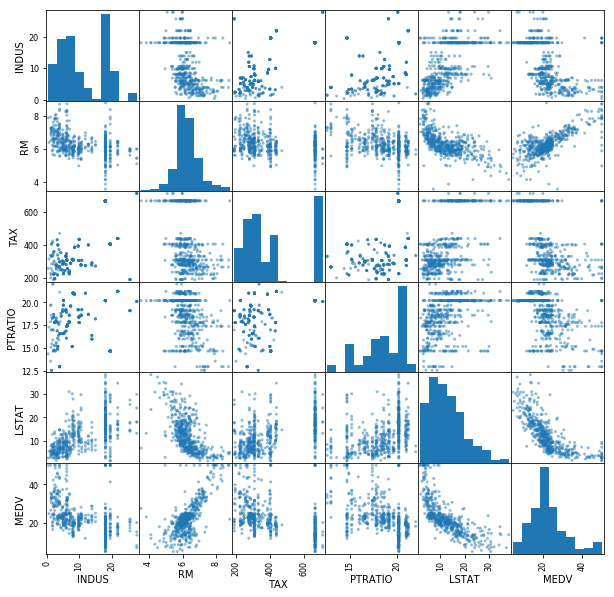

In [20]:
pd.scatter_matrix(sub_boston, figsize=(10,10))
pyplt.show()

In [6]:
X = boston["LSTAT"] 
Y = boston["MEDV"] 
X = sm.add_constant(X) 

In [7]:
#univariate regression with lstat

bmodel = sm.OLS(Y, X).fit()
bmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 18 Mar 2019   Prob (F-statistic):           5.08e-88
Time:                        16:16:53   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#subset all independent variables  

indvar = boston[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B' , 'LSTAT']]

dvar = boston[['MEDV']]



In [37]:
X = indvar
Y = dvar
X = sm.add_constant(X)

In [16]:
bmodel = sm.OLS(Y, X).fit()
bmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     116.9
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          8.83e-130
Time:                        20:01:16   Log-Likelihood:                -1516.0
No. Observations:                 506   AIC:                             3056.
Df Residuals:                     494   BIC:                             3107.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.7212      5.051      5.885      0.000      19.798      39.645
CRIM          -0.0696      0.033     -2.138      0.033      -0.134      -0.006
ZN             0.0399      0.014      2.830      0.005       0.012       0.068
INDUS         -0.0417      0.061     -0.686      0.493      -0.161       0.078
NOX          -14.6003      3.899     -3.745      0.000     -22.261      -6.940
RM             4.1847      0.426      9.835      0.000       3.349       5.021
AGE           -0.0018      0.014     -0.134      0.893      -0.029       0.025
DIS           -1.5030      0.206     -7.301      0.000      -1.908      -1.099
TAX            0.0008      0.002      0.346      0.730      -0.004       0.006
PTRATIO       -0.8744      0.132     -6.612      0.000      -1.134      -0.615
B              0.0089      0.003      3.224      0.001       0.003       0.014
LSTAT         -0.5272      0.052    -10.098      0.000      -0.630      -0.425
==============================================================================
Omnibus:                      204.445   Durbin-Watson:                   0.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1060.254
Skew:                           1.714   Prob(JB):                    5.87e-231
Kurtosis:                       9.208   Cond. No.                     1.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
lm = linear_model.LinearRegression()
bmodel = lm.fit(X,Y)


In [10]:
bmodel.intercept_[0]
bmodel.coef_[0]

array([ 0.00000000e+00, -6.95784647e-02,  3.98782863e-02, -4.17129508e-02,
       -1.46002906e+01,  4.18469293e+00, -1.82523921e-03, -1.50300544e+00,
        8.24958933e-04, -8.74392850e-01,  8.89606128e-03, -5.27202119e-01])

In [28]:
for i, col_name in enumerate(X.columns):
    print("The beta coefficient for {} = {}".format(col_name, bmodel.coef_[0][i]))


The beta coefficient for const = 0.0
The beta coefficient for CRIM = -0.06957846470311696
The beta coefficient for ZN = 0.03987828634679888
The beta coefficient for INDUS = -0.04171295079738956
The beta coefficient for NOX = -14.600290646143737
The beta coefficient for RM = 4.184692931044942
The beta coefficient for AGE = -0.0018252392094981842
The beta coefficient for DIS = -1.503005443268214
The beta coefficient for TAX = 0.0008249589332671409
The beta coefficient for PTRATIO = -0.874392850265562
The beta coefficient for B = 0.00889606127930982
The beta coefficient for LSTAT = -0.5272021193867249


In [11]:
bmodel = sm.OLS(Y, X).fit()
bmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     116.9
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          8.83e-130
Time:                        16:43:54   Log-Likelihood:                -1516.0
No. Observations:                 506   AIC:                             3056.
Df Residuals:                     494   BIC:                             3107.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.7212      5.051      5.885      0.000      19.798      39.645
CRIM          -0.0696      0.033     -2.138      0.033      -0.134      -0.006
ZN             0.0399      0.014      2.830      0.005       0.012       0.068
INDUS         -0.0417      0.061     -0.686      0.493      -0.161       0.078
NOX          -14.6003      3.899     -3.745      0.000     -22.261      -6.940
RM             4.1847      0.426      9.835      0.000       3.349       5.021
AGE           -0.0018      0.014     -0.134      0.893      -0.029       0.025
DIS           -1.5030      0.206     -7.301      0.000      -1.908      -1.099
TAX            0.0008      0.002      0.346      0.730      -0.004       0.006
PTRATIO       -0.8744      0.132     -6.612      0.000      -1.134      -0.615
B              0.0089      0.003      3.224      0.001       0.003       0.014
LSTAT         -0.5272      0.052    -10.098      0.000      -0.630      -0.425
==============================================================================
Omnibus:                      204.445   Durbin-Watson:                   0.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1060.254
Skew:                           1.714   Prob(JB):                    5.87e-231
Kurtosis:                       9.208   Cond. No.                     1.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
##RFE

lm = linear_model.LinearRegression()
step=RFE(lm)
step

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=None, step=1, verbose=0)

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [5]:
X = boston[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B' , 'LSTAT']]
Y = boston[['MEDV']]

lm = linear_model.LinearRegression()
step=RFE(lm)
step = step.fit(X, Y)
         
print(step.ranking_) 
step_feature = np.array(step.support_)
step_column = np.array(X.columns)
list_Var = step_column[step_feature]
print(list_Var)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2 4 3 1 1 6 1 7 1 5 1]
['NOX' 'RM' 'DIS' 'PTRATIO' 'LSTAT']


In [29]:
step = step.fit(X, Y)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
print(step.support_)           
print(step.ranking_) 

[False  True False False  True  True False  True False  True False  True]
[7 1 3 2 1 1 5 1 6 1 4 1]


In [ ]:
boston[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B' , 'LSTAT']]

In [42]:
step_feature = np.array(step.support_)
step_col = np.array(X.columns)
result = step_col[step_feature]
print(result)

['NOX' 'RM' 'DIS' 'PTRATIO' 'LSTAT']


In [34]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """

    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

Reference: http://trevor-smith.github.io/stepwise-post/

In [36]:
tt=forward_selected(boston, 'MEDV')

In [ ]:
print(tt.summary())

In [45]:
##rebuild the model after stepwise and rfe

#subset all independent variables  
indvar = boston[['NOX', 'RM', 'DIS', 'PTRATIO', 'B' , 'LSTAT']]



#subset dependent variable
dvar = boston[['MEDV']]

In [48]:
X = boston[['NOX', 'RM', 'DIS', 'PTRATIO', 'B' , 'LSTAT']]
Y = boston[['MEDV']]
X = sm.add_constant(X)

bmodelfinal = sm.OLS(Y, X).fit()
bmodelfinal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     209.0
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          1.11e-132
Time:                        20:51:07   Log-Likelihood:                -1522.3
No. Observations:                 506   AIC:                             3059.
Df Residuals:                     499   BIC:                             3088.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.5170      4.960      6.153      0.000      20.773      40.261
NOX          -15.8424      3.279     -4.832      0.000     -22.285      -9.400
RM             4.3548      0.411     10.602      0.000       3.548       5.162
DIS           -1.1596      0.167     -6.960      0.000      -1.487      -0.832
PTRATIO       -1.0121      0.113     -8.988      0.000      -1.233      -0.791
B              0.0096      0.003      3.578      0.000       0.004       0.015
LSTAT         -0.5455      0.048    -11.267      0.000      -0.641      -0.450
==============================================================================
Omnibus:                      201.666   Durbin-Watson:                   0.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1060.765
Skew:                           1.680   Prob(JB):                    4.55e-231
Kurtosis:                       9.246   Cond. No.                     9.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
##Stepwise

X = boston[['CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B' , 'LSTAT']]
Y = boston[['MEDV']]
X = sm.add_constant(X)

bmodelfinal = sm.OLS(Y, X).fit()
bmodelfinal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     161.5
Date:                Mon, 25 Mar 2019   Prob (F-statistic):          6.03e-133
Time:                        14:09:17   Log-Likelihood:                -1516.2
No. Observations:                 506   AIC:                             3050.
Df Residuals:                     497   BIC:                             3088.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.5756      4.926      6.004      0.000      19.897      39.254
CRIM          -0.0657      0.031     -2.149      0.032      -0.126      -0.006
ZN             0.0412      0.014      3.039      0.002       0.015       0.068
NOX          -15.2292      3.258     -4.674      0.000     -21.631      -8.827
RM             4.2141      0.412     10.235      0.000       3.405       5.023
DIS           -1.4643      0.191     -7.686      0.000      -1.839      -1.090
PTRATIO       -0.8764      0.118     -7.419      0.000      -1.108      -0.644
B              0.0088      0.003      3.260      0.001       0.004       0.014
LSTAT         -0.5320      0.049    -10.896      0.000      -0.628      -0.436
==============================================================================
Omnibus:                      204.696   Durbin-Watson:                   0.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1061.747
Skew:                           1.716   Prob(JB):                    2.78e-231
Kurtosis:                       9.211   Cond. No.                     9.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#fitting model with prediction data and telling it my target
model.fit(bmodel, Y_test)

model.predict(test_data.head())

In [9]:
X = boston[['CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B' , 'LSTAT']]
Y = boston[['MEDV']]
X = sm.add_constant(X)

lm = linear_model.LinearRegression()
bmodelfinal = lm.fit(X,Y)

In [11]:
lm = linear_model.LinearRegression()
bmodelfinal = lm.fit(X,Y)

In [12]:
##split the data for test and train

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)


In [13]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 9)
(102, 9)
(404, 1)
(102, 1)


In [29]:
Y_test

,MEDV
13,20.4
68,17.4
28,18.4
32,13.2
294,21.7
331,17.1
135,18.1
502,20.6
202,42.3
245,18.5


In [36]:
lm = linear_model.LinearRegression()
bmodel = lm.fit(X_train,Y_train)
bmodel = sm.OLS(Y_train, X_train).fit()
bmodel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     142.4
Date:                Mon, 25 Mar 2019   Prob (F-statistic):          2.30e-111
Time:                        12:01:22   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2407.
Df Residuals:                     395   BIC:                             2443.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.6968      5.373      5.155      0.000      17.133      38.260
CRIM          -0.0724      0.031     -2.367      0.018      -0.133      -0.012
ZN             0.0332      0.014      2.307      0.022       0.005       0.061
NOX          -14.5114      3.544     -4.094      0.000     -21.479      -7.543
RM             4.4777      0.444     10.091      0.000       3.605       5.350
DIS           -1.3210      0.201     -6.578      0.000      -1.716      -0.926
PTRATIO       -0.9241      0.129     -7.156      0.000      -1.178      -0.670
B              0.0084      0.003      2.849      0.005       0.003       0.014
LSTAT         -0.4950      0.052     -9.562      0.000      -0.597      -0.393
==============================================================================
Omnibus:                      157.988   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              824.322
Skew:                           1.603   Prob(JB):                    1.00e-179
Kurtosis:                       9.220   Cond. No.                     9.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
lm_predict=lm.predict(X_test)
lm_predict=pd.DataFrame(lm_predict)
true_val = Y_test

,0
0,19.735506
1,23.409232
2,14.614452
3,14.842305
4,21.540490
5,28.338620
6,32.064498
7,23.793602
8,22.793742
9,19.172610


In [39]:
true_val = Y_test

,MEDV
15,19.9
216,23.3
354,18.2
33,13.1
368,50.0
92,22.9
227,31.6
326,23.0
44,21.2
451,15.2


In [40]:
data=display(X_test, Y_test,lm_predict, pd.concat([X_test, Y_test, lm_predict], axis=1))

,const,CRIM,ZN,NOX,RM,DIS,PTRATIO,B,LSTAT
15,1.0,0.62739,0.0,0.5380,5.834,4.4986,21.0,395.62,8.47
216,1.0,0.04560,0.0,0.5500,5.888,3.1121,16.4,392.80,13.51
354,1.0,0.04301,80.0,0.4130,5.663,10.5857,22.0,382.80,8.05
33,1.0,1.15172,0.0,0.5380,5.701,3.7872,21.0,358.77,18.35
368,1.0,4.89822,0.0,0.6310,4.970,1.3325,20.2,375.52,3.26
92,1.0,0.04203,28.0,0.4640,6.442,3.6659,18.2,395.01,8.16
227,1.0,0.41238,0.0,0.5040,7.163,3.2157,17.4,372.08,6.36
326,1.0,0.30347,0.0,0.4930,6.312,5.4159,19.6,396.90,6.15
44,1.0,0.12269,0.0,0.4480,6.069,5.7209,17.9,389.39,9.55
451,1.0,5.44114,0.0,0.7130,6.655,2.3552,20.2,355.29,17.73


,MEDV
15,19.9
216,23.3
354,18.2
33,13.1
368,50.0
92,22.9
227,31.6
326,23.0
44,21.2
451,15.2


,0
0,19.735506
1,23.409232
2,14.614452
3,14.842305
4,21.540490
5,28.338620
6,32.064498
7,23.793602
8,22.793742
9,19.172610


,const,CRIM,ZN,NOX,RM,DIS,PTRATIO,B,LSTAT,MEDV,0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.735506
1,1.0,0.02731,0.0,0.4690,6.421,4.9671,17.8,396.90,9.14,21.6,23.409232
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.614452
3,1.0,0.03237,0.0,0.4580,6.998,6.0622,18.7,394.63,2.94,33.4,14.842305
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.540490
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.338620
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.064498
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.793602
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.793742
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.172610


In [46]:
data=display(pd.concat([X_test.reset_index(drop=True), Y_test.reset_index(drop=True), lm_predict.reset_index(drop=True)], axis=1, ignore_index=True))

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.62739,0.0,0.5380,5.834,4.4986,21.0,395.62,8.47,19.9,19.735506
1,1.0,0.04560,0.0,0.5500,5.888,3.1121,16.4,392.80,13.51,23.3,23.409232
2,1.0,0.04301,80.0,0.4130,5.663,10.5857,22.0,382.80,8.05,18.2,14.614452
3,1.0,1.15172,0.0,0.5380,5.701,3.7872,21.0,358.77,18.35,13.1,14.842305
4,1.0,4.89822,0.0,0.6310,4.970,1.3325,20.2,375.52,3.26,50.0,21.540490
5,1.0,0.04203,28.0,0.4640,6.442,3.6659,18.2,395.01,8.16,22.9,28.338620
6,1.0,0.41238,0.0,0.5040,7.163,3.2157,17.4,372.08,6.36,31.6,32.064498
7,1.0,0.30347,0.0,0.4930,6.312,5.4159,19.6,396.90,6.15,23.0,23.793602
8,1.0,0.12269,0.0,0.4480,6.069,5.7209,17.9,389.39,9.55,21.2,22.793742
9,1.0,5.44114,0.0,0.7130,6.655,2.3552,20.2,355.29,17.73,15.2,19.172610


In [47]:
data=pd.concat([X_test.reset_index(drop=True), Y_test.reset_index(drop=True), lm_predict.reset_index(drop=True)]
               , axis=1, ignore_index=True)

data=pd.DataFrame(data)
columns=['CONST','CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B' , 'LSTAT', 'MEDV', 'Predicted']
data.columns=['CONST','CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B' , 'LSTAT', 'MEDV', 'PREDICTED']
data


,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.62739,0.0,0.5380,5.834,4.4986,21.0,395.62,8.47,19.9,19.735506
1,1.0,0.04560,0.0,0.5500,5.888,3.1121,16.4,392.80,13.51,23.3,23.409232
2,1.0,0.04301,80.0,0.4130,5.663,10.5857,22.0,382.80,8.05,18.2,14.614452
3,1.0,1.15172,0.0,0.5380,5.701,3.7872,21.0,358.77,18.35,13.1,14.842305
4,1.0,4.89822,0.0,0.6310,4.970,1.3325,20.2,375.52,3.26,50.0,21.540490
5,1.0,0.04203,28.0,0.4640,6.442,3.6659,18.2,395.01,8.16,22.9,28.338620
6,1.0,0.41238,0.0,0.5040,7.163,3.2157,17.4,372.08,6.36,31.6,32.064498
7,1.0,0.30347,0.0,0.4930,6.312,5.4159,19.6,396.90,6.15,23.0,23.793602
8,1.0,0.12269,0.0,0.4480,6.069,5.7209,17.9,389.39,9.55,21.2,22.793742
9,1.0,5.44114,0.0,0.7130,6.655,2.3552,20.2,355.29,17.73,15.2,19.172610


In [48]:
data=pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.62739,0.0,0.5380,5.834,4.4986,21.0,395.62,8.47,19.9,19.735506
1,1.0,0.04560,0.0,0.5500,5.888,3.1121,16.4,392.80,13.51,23.3,23.409232
2,1.0,0.04301,80.0,0.4130,5.663,10.5857,22.0,382.80,8.05,18.2,14.614452
3,1.0,1.15172,0.0,0.5380,5.701,3.7872,21.0,358.77,18.35,13.1,14.842305
4,1.0,4.89822,0.0,0.6310,4.970,1.3325,20.2,375.52,3.26,50.0,21.540490
5,1.0,0.04203,28.0,0.4640,6.442,3.6659,18.2,395.01,8.16,22.9,28.338620
6,1.0,0.41238,0.0,0.5040,7.163,3.2157,17.4,372.08,6.36,31.6,32.064498
7,1.0,0.30347,0.0,0.4930,6.312,5.4159,19.6,396.90,6.15,23.0,23.793602
8,1.0,0.12269,0.0,0.4480,6.069,5.7209,17.9,389.39,9.55,21.2,22.793742
9,1.0,5.44114,0.0,0.7130,6.655,2.3552,20.2,355.29,17.73,15.2,19.172610


In [49]:
columns=['CONST','CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B' , 'LSTAT', 'MEDV', 'Predicted']

In [50]:
data.columns=['CONST','CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B' , 'LSTAT', 'MEDV', 'PREDICTED']
data

,CONST,CRIM,ZN,NOX,RM,DIS,PTRATIO,B,LSTAT,MEDV,PREDICTED
0,1.0,0.62739,0.0,0.5380,5.834,4.4986,21.0,395.62,8.47,19.9,19.735506
1,1.0,0.04560,0.0,0.5500,5.888,3.1121,16.4,392.80,13.51,23.3,23.409232
2,1.0,0.04301,80.0,0.4130,5.663,10.5857,22.0,382.80,8.05,18.2,14.614452
3,1.0,1.15172,0.0,0.5380,5.701,3.7872,21.0,358.77,18.35,13.1,14.842305
4,1.0,4.89822,0.0,0.6310,4.970,1.3325,20.2,375.52,3.26,50.0,21.540490
5,1.0,0.04203,28.0,0.4640,6.442,3.6659,18.2,395.01,8.16,22.9,28.338620
6,1.0,0.41238,0.0,0.5040,7.163,3.2157,17.4,372.08,6.36,31.6,32.064498
7,1.0,0.30347,0.0,0.4930,6.312,5.4159,19.6,396.90,6.15,23.0,23.793602
8,1.0,0.12269,0.0,0.4480,6.069,5.7209,17.9,389.39,9.55,21.2,22.793742
9,1.0,5.44114,0.0,0.7130,6.655,2.3552,20.2,355.29,17.73,15.2,19.172610


In [59]:
#Linearity & Equal variance

pred_val = bmodel.fittedvalues.copy()
true_val = Y_test



In [ ]:
pre_val=bmodel.fit(bmodel, Y_test)

In [48]:
pred_val

111    28.044868
245    12.986867
432    20.693946
458    16.670136
88     31.541900
388     5.559015
353    23.769045
418     8.489001
26     15.919751
128    21.312487
48      9.146077
84     24.793614
86     21.978028
188    32.911235
55     30.479318
82     25.798996
21     18.192180
357    19.270461
204    42.892672
454    15.455304
402    18.069593
449    16.958309
291    34.034313
288    26.209955
209    14.010199
195    40.917307
340    20.325506
294    23.882408
148    10.586839
352    17.933670
         ...    
70     25.438735
337    18.225008
392     8.737936
18     16.092954
68     17.727941
254    24.432960
362    16.198671
56     25.354202
341    31.648941
239    27.916235
342    24.840678
421    17.182340
176    25.079599
369    28.783720
271    26.437051
94     26.449152
73     24.161571
482    27.998969
279    33.952027
409    20.231241
143    13.250746
113    22.011728
217    27.963312
475    15.690258
339    20.199233
22     16.844694
404     8.198712
412     0.9550

In [44]:
true_val

,MEDV
292,27.9
99,33.2
390,15.1
162,50.0
490,8.1
47,16.6
483,21.8
106,19.5
502,20.6
379,10.2


In [46]:
residual = true_val - pred_val

/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


In [166]:
residual

0      -7.506627
1      -3.584798
2       3.627810
3       4.576926
4       8.011110
5       3.478488
6       0.054041
7       7.759655
8       5.407729
9       0.220054
10     -3.876085
11     -2.469036
12      0.928627
13      0.143452
14     -1.794262
15     -0.077025
16      1.761959
17     -0.087143
18      3.371583
19     -0.830965
20      0.579809
21      1.272477
22     -1.351245
23      0.134044
24     -0.685798
25     -0.032705
26      0.560469
27     -0.615962
28     -1.978675
29     -0.812644
         ...    
476    -3.023715
477     1.320003
478    -3.892195
479     0.037472
480     0.594878
481    -2.506951
482    -2.788889
483     2.029745
484     2.264806
485    -0.084154
486     0.449286
487     0.302841
488    -1.383981
489    -5.932738
490    -0.149079
491    -5.069173
492    -0.782082
493     0.099135
494     2.702252
495     5.114145
496     4.808229
497    -1.858131
498    -1.260349
499    -1.921009
500    -4.791296
501    -2.443489
502    -2.893419
503    -5.1422

In [10]:
pred_val = bmodelfinal.fittedvalues.copy()
true_val = boston['MEDV'].values.copy()

residual = true_val - pred_val

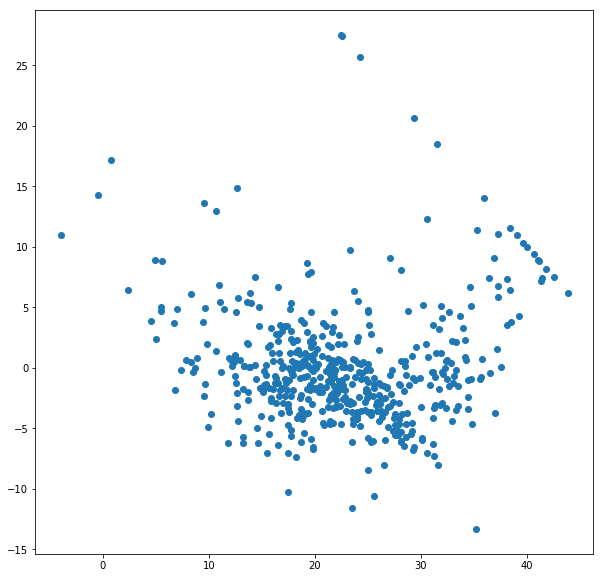

In [11]:
fig, ax = pyplt.subplots(figsize=(10,10))
test = ax.scatter(pred_val, residual)
test

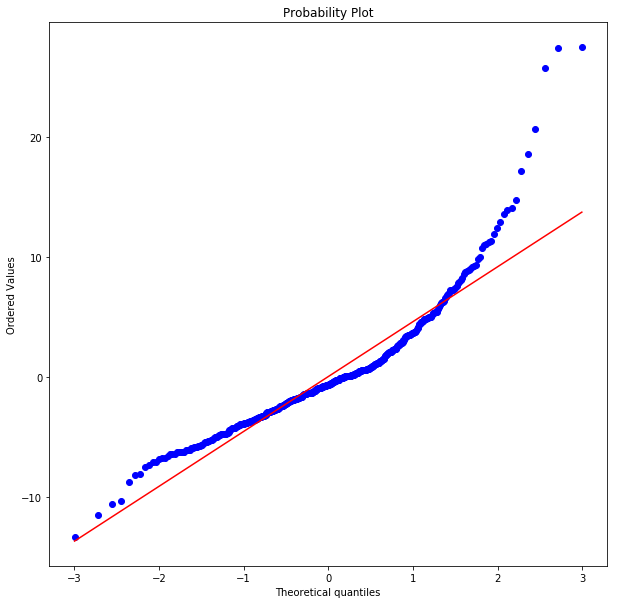

In [21]:
#normality

fig, ax = pyplt.subplots(figsize=(10,10))
test = sp.stats.probplot(residual, plot=ax, fit=True)

In [35]:
#normality test
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = jarque_bera(bmodelfinal.resid)
test
print(name, test)

['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis'] (1060.7651694498352, 4.54747328486568e-231, 1.6804295200076897, 9.246406885335817)


Reference: https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/

In [26]:
stat, p =shapiro(residual)
print (stat, p)

0.8863661289215088 7.547573310088302e-19


In [33]:
anderson(residual, 'norm')

AndersonResult(statistic=12.034597416983388, critical_values=array([0.572, 0.651, 0.781, 0.911, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [32]:
kstest(residual, 'norm')

KstestResult(statistic=0.33250115654316975, pvalue=0.0)

In [20]:
sm.stats.stattools.durbin_watson(residual)

0.9821464968495007

##### Regression diagnostics
Reference : http://www.statsmodels.org/stable/diagnostic.html 
and https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/


In [23]:
#bp test
_, pval, __, f_pval = sm.stats.diagnostic.het_breuschpagan(residual, X)
pval, f_pval

#bp test
#reject the null

(3.997513690419452e-05, 3.0494105734825324e-05)

In [54]:
name=['BP value', 'BP p-value', 'F statistics', 'F statistics p-value']
test=sm.stats.diagnostic.het_breuschpagan(residual, X)
print(name, test)

['BP value', 'BP p-value', 'F statistics', 'F statistics p-value'] (37.711034866013456, 8.512313028500243e-06, 5.002889701619954, 5.530881754120389e-06)


In [47]:
#test multicollearity

np.linalg.cond(X)

9031.267828092696

In [13]:
#VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)


,VIF Factor,features
0,1.7,CRIM
1,2.6,ZN
2,51.3,NOX
3,69.5,RM
4,11.6,DIS
5,69.6,PTRATIO
6,18.2,B
7,9.7,LSTAT


Reference: https://etav.github.io/python/vif_factor_python.html

In [12]:
##linearity test
linear_harvey_collier(bmodelfinal)

/anaconda3/lib/python3.6/site-packages/statsmodels/sandbox/stats/diagnostic.py:1221: RuntimeWarning: invalid value encountered in sqrt
  rresid_scaled = rresid/np.sqrt(rvarraw)   #this is N(0,sigma2) distributed


Ttest_1sampResult(statistic=nan, pvalue=nan)

### END